# Expectation Maximization

Expectation Maximization (EM) is a general method to get estimates of parameters in a probability distribution in statistical models where we have observed data $X$, latent variables $Z$, and parameters $\theta$.

A good and common example is the Gaussian Mixture model where we might be interested in finding estimates of the cluster means and covariances (which in this case are incorporated in $\theta$). In this model we have observed data $x_i$ which are outputs from one of the gaussians in the mixture and latent variables $z_i$ which denote from which cluster it came from, i.e. cluster assignments. We can only observe $X$ and we want to use these to get estimates of the aforementioned model parameters.

The intuition of EM in this example is that when we observe some outcome, it could have come from any of these gaussians in the mixture (but with different probabilities). Thus when we update the parameters for each of the clusters we want to assign some "responsibility" for the outcome to each cluster and this should then affect how much the observed outcome should affect the update of the parameters. The KMeans algorithm is a special case of EM where all responsibility is given to the closest cluster so this method is more general.

## How it works
The EM procedure is iterative. In each step we have some estimation of the parameters $\theta$ that we are interested in and using these we want to find the next estimate $\theta^{new}$ where $\theta^{new}$ gives a model with higher data likelihood (better fit), i.e.

$$p(x_1, \dotsc, x_N\ |\ \theta^{new}) > p(x_1, \dotsc, x_N\ |\ \theta)$$

The hard part of doing this for many models that becomes easy with EM, is that we have the hidden (latent) variables. If we didn't have them we would just maximize the likelihood function directly to get the new $\theta$.

The next mental thought step is to imagine that we have the latent variables $Z$ in the model but that we somehow knew the values for them. Then we could just maximize

$$p(Z=(z_1, \dotsc, z_N), X=(x_1, \dotsc, x_N)\ |\ \theta)$$

But since we can't actually know these values the best we can do is to considering all the possible outcomes of $Z$ by computing the posterior distribution for $Z$ given the last estimate of $\theta$ and observations $X$. Using some shorter notation from now on.

$$p(Z\ |\ X, \theta)$$

We define

$$Y(\theta') = log\ p(Z, X\ |\ \theta')$$

and what the EM algorithm does is that it maximizes the expectation (hence the name) of this function, so $\theta^{new} = argmax_{\theta'}\ Y(\theta')$.

To do this, EM defines the following help function*

\begin{align*}
Q(\theta', \theta) &= \mathbb{E} \left[ Y(\theta')\ |\ X, \theta \right] \\
&= \mathbb{E} \left[ log\ p(Z, X\ |\ \theta')\ |\ X, \theta \right] \\
&= \sum^K_{z_1=1} \dotsc \sum^K_{z_N=1} p(Z\ |\ X, \theta) log\ p(Z, X\ |\ \theta') && \text{Expected value definition, sum over all possible sequence values of $Z$}
\end{align*}

Here, $K$ is the number of possible values for the latent variables, like cluster assignments for example. The latent variables could also be continuous random variables in which case we would have integrals instead. The updated parameters are obtained by $\theta^{new} = argmax_{\theta'}\ Q(\theta', \theta)$

In the case where the latent variables $z_i$ are independent from each other and observed $x_i$ are also independent we can continue like this. TODO: when can we do this trick? TODO: can do this for hmm transitions as well, with small changes. Its just bayes rule really

\begin{align*}
Q(\theta', \theta) &= \sum^K_{z_1=1} \dotsc \sum^K_{z_N=1} p(Z\ |\ X, \theta) log\ p(Z, X\ |\ \theta') \\
&= \sum^K_{z_1=1} \dotsc \sum^K_{z_N=1} p(Z\ |\ X, \theta) log\ \prod^N_{n=1} p(z_n, x_n\ |\ \theta') && \text{Using the independence} \\
&= \sum^K_{z_1=1} \dotsc \sum^K_{z_N=1} p(Z\ |\ X, \theta) \sum^N_{n=1} log\ p(z_n, x_n\ |\ \theta') && \text{log of product is a sum of logs} \\
&= \sum^N_{n=1} \sum^K_{z_1=1} \dotsc \sum^K_{z_N=1} p(Z\ |\ X, \theta) log\ p(z_n, x_n\ |\ \theta') && \text{Rearrange the sums} \\
&= \bigg\{ p(Z\ |\ X, \theta) = p(z_1,\dotsc,z_N\ |\ X, \theta) = p(z_1,\dotsc,z_{n-1},z_{n+1},\dotsc,z_N\ |\ z_n, X, \theta) p(z_n\ |\ X, \theta) \bigg\} && \text{Bayes' rule} \\
&= \sum^N_{n=1} \sum^K_{z_n=1} p(z_n\ |\ X, \theta) log\ p(z_n, x_n\ |\ \theta')\ \cdot \\
&\qquad \cdot \underbrace{\sum^K_{z_1=1} \dotsc \sum^K_{z_{n-1}=1} \sum^K_{z_{n+1}=1} \dotsc \sum^K_{z_N=1} p(z_1,\dotsc,z_{n-1},z_{n+1},\dotsc,z_N\ |\ z_n, X, \theta)}_{=1} && \text{Use previous and rearrange sums} \\
&= \bigg\{ \text{Since the right part is a sum of probabilities of all possible sequences and thus =1} \bigg\} \\
&= \bigg\{ p(z_n=k\ |\ X, \theta) = \gamma_{n,k} \bigg\} && \text{Only known values in posteriors} \\
&= \sum^N_{n=1} \sum^K_{z_n=1} \gamma_{n,k} log\ p(z_n, x_n\ |\ \theta')
\end{align*}

This is the expression to maximize in order to find the new parameter estimates. This is done by differentiating with respect to each parameter $\theta'_i$, setting $\frac{\partial Q}{\partial \theta'_i} = 0$, and then solving for $\theta_i$. If we have constraints, like weight factors in a GMM (probabilities for different gaussians in the mixture), these can be handled by using Lagrange multipliers added into the function to maximize.

In models where there is no independence between the latent $z_i$ the previous expression where we break out some of the latent variables from the rest using Bayes' rule, has to be altered a bit to take the dependence into account but roughly the same idea still applies.

After all this is done, the algorithm consists of two steps that are repeated until done. First the *expectation* step which is to compute the posteriors $\gamma_{n,k}$ using the current estimate of parameters. The second step, *maximization*, is to maximize the $Q$ function in order to find $\theta^{new}$.

*TODO: is this about jensens inequality?

## TODO
more examples of when it's a good idea to use EM

jensens inequality

contrast to full bayesian treatment where the parameters would be treated as variables too and we compute posterior distribtions for them as well

do example when xs and zs in sequences are not independent, like HMM

## Example: Gaussian Mixture Model
The Gaussian Mixture Model models data by assuming that the data was created through two steps:
1. The latent variable $z_i$ is sampled from a categorical distribution $z_i \sim Cat(w_1, w_2, \dotsc, w_K)$
2. The observed value $x_i$ is then sampled from the gaussian corresponding to the value of $z_i$

This process happens independently for each $i$.

The probability density function of the Gaussian Mixture Model can be written generally as the following. $D$ is the dimension of the gaussians.

\begin{align*}
p(x) &= \sum^K_{k=1} w_k \mathcal{N}(x\ |\ \mu_k, C_k) \\
&=\sum^K_{k=1} w_k \frac{1}{(2\pi)^{D/2}\sqrt{det\ C_k}} exp \left(-\frac{1}{2} (x - \mu_k)^T C_k^{-1} (x - \mu_k) \right) \\
\\
\sum^K_{k=1} w_k &= 1
\end{align*}

The conditional density function is

\begin{equation*}
p(x\ |\ z=k) = \mathcal{N}(x\ |\ \mu_k, C_k) = \frac{1}{(2\pi)^{D/2}\sqrt{det\ C_k}} exp \left( -\frac{1}{2} (x - \mu_k)^T C_k^{-1} (x - \mu_k) \right)
\end{equation*}

We can then start by finding the posteriors that uses the current estimate of the parameters. This is only using known values so it can be computed easily.

\begin{align*}
\gamma_{n, k} &= p(z_n = k\ |\ x_n, \theta) \\
&= \frac{p(x_n\ |\ z_n = k, \theta)p(z_n = k\ |\ \theta)}{p(x_n\ |\ \theta)} && \text{Bayes' rule} \\
&= \frac{w_k \mathcal{N}(x_n\ |\ \mu_k, C_k)}{\sum^K_{k'=1} w_{k'}\mathcal{N}(x_n\ |\ \mu_{k'}, C_{k'})} \\
\end{align*}

Then we define the EM help function for this model. TODO: change some indices $z_n$ to $k$ instead and events to $z_n =k$ instead of just $z_n$

\begin{align*}
Q(\theta', \theta) &= \sum^N_{n=1} \sum^K_{z_n=1} \gamma_{n,k} log\ p(z_n, x_n\ |\ \theta') \\
&= \sum^N_{n=1} \sum^K_{z_n=1} \gamma_{n,k} log \left( p(x_n\ |\ z_n, \theta') p(z_n\ |\ \theta') \right) \\
&= \sum^N_{n=1} \sum^K_{z_n=1} \gamma_{n,k} \left( log\ w_k' + log\ \mathcal{N}(x_n\ |\ \mu_k', C_k') \right) \\
&= \sum^N_{n=1} \sum^K_{z_n=1} \gamma_{n,k} log\ w_k' + \gamma_{n,k} \left( -log \left( (2\pi)^{D/2}\sqrt{det\ C_k'} \right) -\frac{1}{2} (x - \mu_k')^T C_k'^{-1} (x - \mu_k') \right) \\
&= \sum^N_{n=1} \sum^K_{z_n=1} \gamma_{n,k} log\ w_k' + \gamma_{n,k} \left( -\left( \frac{D}{2}log\ (2\pi) +\frac{1}{2} log\ det\ C_k' \right) -\frac{1}{2} (x - \mu_k')^T C_k'^{-1} (x - \mu_k') \right) \\
&= \underbrace{\sum^N_{n=1} \sum^K_{z_n=1} \gamma_{n,k} \left( -\frac{D}{2}log\ (2\pi) \right)}_\text{constant} + \underbrace{\sum^N_{n=1} \sum^K_{z_n=1} \gamma_{n,k} log\ w_k'}_{Q_{w'}} + \underbrace{\sum^N_{n=1} \sum^K_{z_n=1} \gamma_{n,k} \left( -\frac{1}{2} log\ det\ C_k' -\frac{1}{2} (x - \mu_k')^T C_k'^{-1} (x - \mu_k') \right)}_{Q_{\mu',C'}}
\end{align*}

Next we differentiate with respect to each parameter to get their update steps. We only need to look at the part of $Q$ with those variables, which is why it was split up in the last step.

\begin{align*}
0 = \frac{\partial Q_{\mu',C'}}{\partial \mu_k'} &= \frac{\partial}{\partial \mu_k'} \sum^N_{n=1} \gamma_{n,k} \left( -\frac{1}{2} \right) (x - \mu_k')^T C_k'^{-1} (x - \mu_k') && \text{Skipping constants with respect to $\mu_k'$} \\
&= \text{TODO: write steps} \\
&= \sum^N_{n=1} \gamma_{n,k} C_m'^{-1}(x_n - \mu_k') \\
\\
\mu_k^{new} = \mu_k' &= \frac{\sum^N_{n=1} \gamma_{n,k} x_n}{\sum^N_{n=1} \gamma_{n,k}} \\
\\
0 = \frac{\partial Q_{\mu',C'}}{\partial C_k'} &= \text{TODO: write steps} \\
&= \frac{\sum^N_{n=1} \gamma_{n,k} (x_n - \mu_k^{new})(x_n - \mu_k^{new})^T}{\sum^N_{n=1} \gamma_{n,k}} \\
\\
C_k^{new} &= TODO
\end{align*}

For the GMM weights, we have a constraint so we need to use a Lagrangian multiplier which we do by formulating a new function to maximize that incorporates these constraints. Then we can maxmimize that function instead.

\begin{align*}
L &= Q_{w'} + \lambda \left( 1 - (\sum^K_{k=1} w_k') \right) && \text{$\lambda$ is the Lagrangian multiplier} \\
&= \sum^N_{n=1} \sum^K_{k=1} \left( \gamma_{n,k} log\ w_k' \right) + \lambda \left( 1 - (\sum^K_{k=1} w_k') \right) \\
\\
0 = \frac{L}{\partial w_k'} &= \sum^N_{n=1} \frac{\gamma_{n,k}}{w_k'} - \lambda \\
w_k' &= \frac{1}{\lambda} \sum^N_{n=1} \gamma_{n,k} \\
1 &= \sum^K_{k=1} \frac{1}{\lambda} \sum^N_{n=1} \gamma_{n,k} && \text{The constraint we have} \\
\lambda &= \sum^K_{k=1} \sum^N_{n=1} \gamma_{n,k} && \text{Simplified} \\
\\
w_k^{new} = w_k' &= \frac{\sum^N_{n=1} \gamma_{n,k}}{\sum^K_{k=1} \sum^N_{n=1} \gamma_{n,k}} && \text{Put back in expression for update step}
\end{align*}

# EM implementation for 2d GMM

In [2]:
import numpy as np
from scipy.stats import norm, multivariate_normal
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from contrib import plot_cov_ellipse

%matplotlib inline

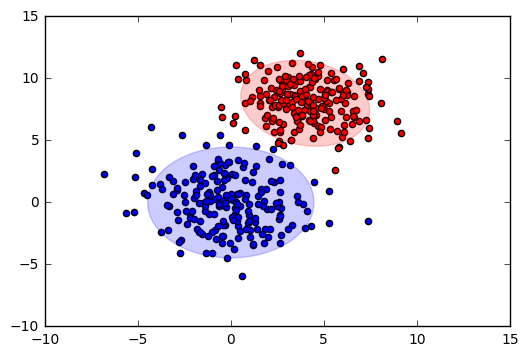

In [4]:
# The true mixture model parameters
mu_1 = np.array([0, 0])
mu_2 = np.array([4, 8])
C_1 = np.array([[5, 0], 
                [0, 5]])
C_2 = np.array([[3, -0.5], 
                [-0.5, 3]])

# Plot the pdfs of each gaussian as contours or just 
plot_cov_ellipse(C_1, mu_1, nstd=2, color="b", alpha=0.2)
plot_cov_ellipse(C_2, mu_2, nstd=2, color="r", alpha=0.2)

# Generate 2d data samples
X_1 = np.random.multivariate_normal(mu_1, C_1, 200)
X_2 = np.random.multivariate_normal(mu_2, C_2, 200)
X = np.vstack((X_1, X_2))

# Plot the sampled points
plt.scatter(X_1[:, 0], X_1[:, 1], c="b")
plt.scatter(X_2[:, 0], X_2[:, 1], c="r")

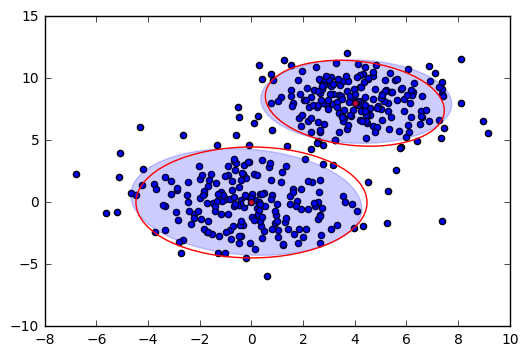

In [5]:
def expectation_maximization_2d_2gmm(X):
    """Performs expectation maximization for a 2d GMM with two gaussians of equal weight.
    
    Computes full covariance matrix.
    """
    
    def expectation(params):
        N_1 = multivariate_normal(*params[0]).pdf
        N_2 = multivariate_normal(*params[1]).pdf
        posteriors = np.column_stack((N_1(X), N_2(X))) # Unnormalized
        posteriors = posteriors / posteriors.sum(axis=1)[:, np.newaxis]
        return posteriors
    
    def maximization(posteriors):
        # Adding epsilon value here to account for very small values
        posterior_sums = posteriors.sum(axis=0) + 10 * np.finfo(posteriors.dtype).eps
        
        means = np.dot(posteriors.T, X) / posterior_sums
        
        diff1 = X - means[0]
        diff2 = X - means[1]
        C_1 = np.dot(posteriors[:, 0] * diff1.T, diff1) / posterior_sums[0]
        C_2 = np.dot(posteriors[:, 1] * diff2.T, diff2) / posterior_sums[1]
        
        return (
            (means[0, :], C_1), 
            (means[1, :], C_2)
        )
    
    # Initial values of parameters
    params = (
        (np.random.randint(-10, 10, 2), np.identity(2)), 
        (np.random.randint(-10, 10, 2), np.identity(2))
    )
    
    for _ in range(10): # TODO: check param deltas instead
        posteriors = expectation(params)
        params = maximization(posteriors)
    
    return params


params = expectation_maximization_2d_2gmm(X)
((em_mu_1, em_C_1), (em_mu_2, em_C_2)) = params

# Plot the sampled points and the estimated parameters
plt.scatter(X[:, 0], X[:, 1], c="b")
plt.scatter(em_mu_1[0], em_mu_1[1], c="w")
plt.scatter(em_mu_2[0], em_mu_2[1], c="w")
plot_cov_ellipse(em_C_1, em_mu_1, nstd=2, color="b", alpha=0.2)
plot_cov_ellipse(em_C_2, em_mu_2, nstd=2, color="b", alpha=0.2)

# Plot the actual parameter values
plt.scatter(mu_1[0], mu_1[1], c="r")
plt.scatter(mu_2[0], mu_2[1], c="r")
plot_cov_ellipse(C_1, mu_1, nstd=2, color="r", fill=False)
plot_cov_ellipse(C_2, mu_2, nstd=2, color="r", fill=False)

The white dot (almost just under the red dot) shows the estimated means, the blue ellipses show the estimated covariance matrices at 2 standard deviations ($\approx 95\%$ confidence interval). The red dot and red ellipses show the same things for the actual model parameter values.